In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [2]:
import plotly.express as px

In [3]:
# pip install plotly==4.10.0

In [6]:
perfomances_dt5 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt5.rds")[None] # also works for RData
perfomances_dt5

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,net_balance,policy_cost,policy_val,policy_name
0,ratio_5,dynamic,12716.475719,39.817674,172.575003,1659.504098,0.000000,-8.9,1659.504098,1.100434,5.0,ratio
1,ratio_6,dynamic,12669.298020,38.258298,166.480672,1633.857958,23.307294,-12.4,1657.165252,3.439280,6.0,ratio
2,ratio_7,dynamic,12614.408659,36.911936,160.901631,1608.333614,45.052457,-15.5,1653.386070,7.218462,7.0,ratio
3,ratio_8,dynamic,12561.314479,35.871759,156.325988,1583.498920,65.656915,-17.9,1649.155835,11.448697,8.0,ratio
4,ratio_9,dynamic,12499.298894,34.846755,151.565652,1558.929124,84.876765,-20.3,1643.805889,16.798643,9.0,ratio
...,...,...,...,...,...,...,...,...,...,...,...,...
113,red_23,static,12351.067200,34.022292,147.434492,1625.945263,0.000000,-22.1,1625.945263,34.659269,23.0,red
114,red_24,static,12203.190573,33.160402,141.153422,1609.639285,0.000000,-24.1,1609.639285,50.965247,24.0,red
115,red_25,static,12203.190573,33.160402,141.153422,1609.639285,0.000000,-24.1,1609.639285,50.965247,25.0,red
116,red_26,static,12175.077916,32.558052,138.587914,1607.499369,0.000000,-25.5,1607.499369,53.105164,26.0,red


In [14]:
plot_dt_long = pd.melt(perfomances_dt5, id_vars=['policy_name','policy_val', 'NMS'], value_vars=['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance'])
# plot_dt_long['policy_name'][plot_dt_long['policy_name'] == 'red'] = 'reduction'
plot_dt_long['policy_NMS'] = plot_dt_long['policy_name']+'_'+ plot_dt_long['NMS']
plot_dt_long

,policy_name,policy_val,NMS,variable,value,policy_NMS
0,ratio,5.0,dynamic,N_fert,172.575003,ratio_dynamic
1,ratio,6.0,dynamic,N_fert,166.480672,ratio_dynamic
2,ratio,7.0,dynamic,N_fert,160.901631,ratio_dynamic
3,ratio,8.0,dynamic,N_fert,156.325988,ratio_dynamic
4,ratio,9.0,dynamic,N_fert,151.565652,ratio_dynamic
...,...,...,...,...,...,...
703,red,23.0,static,net_balance,1625.945263,red_static
704,red,24.0,static,net_balance,1609.639285,red_static
705,red,25.0,static,net_balance,1609.639285,red_static
706,red,26.0,static,net_balance,1607.499369,red_static


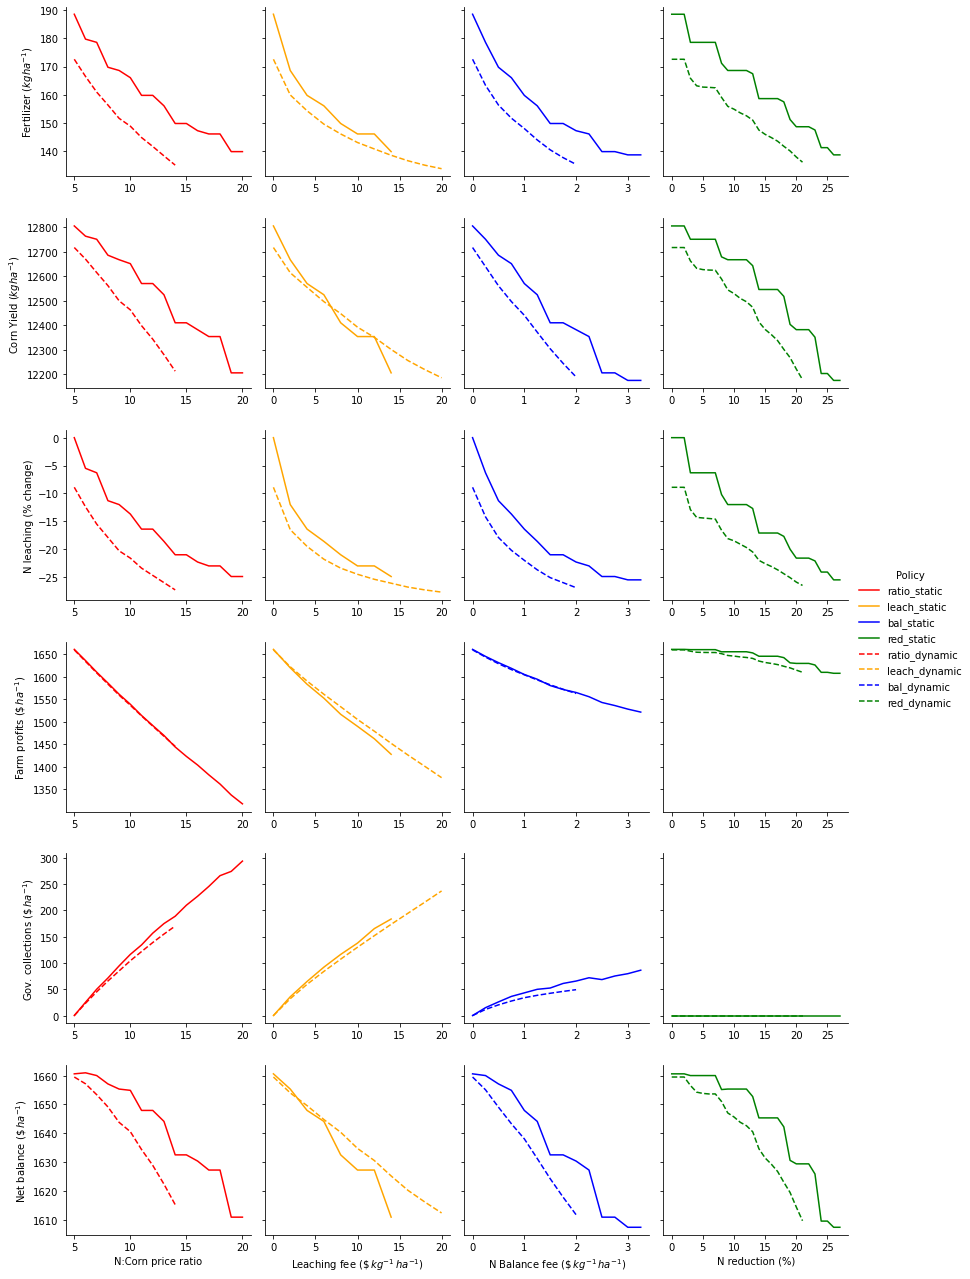

In [30]:
# importing packages 
import seaborn 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['green', 'green'], 'linestyle' : ["-","--"]}
kw = {'color': ['red', 'orange', 'blue', 'green','red', 'orange','blue','green'], 'linestyle' : ["-","-","-","-", "--","--","--", "--"]}

graph = seaborn.FacetGrid(plot_dt_long, row ='variable', col ='policy_name', hue ='policy_NMS', 
                          sharey = 'row', sharex = False, margin_titles=False, hue_kws=kw,
                          hue_order = ['ratio_static', 'leach_static', 'bal_static', 'red_static', 'ratio_dynamic', 'leach_dynamic', 'bal_dynamic', 'red_dynamic'],    
                          col_order = ['ratio', 'leach', 'bal', 'red'],
                          row_order = ['N_fert', 'Y_corn', 'L_change', 'P', 'G', 'net_balance']) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy')  #, loc="lower center",bbox_to_anchor=(0.5, -0.3), ncol=2

graph.axes[5,0].set_xlabel('N:Corn price ratio')
graph.axes[5,1].set_xlabel(r'Leaching fee $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[5,2].set_xlabel(r'N Balance fee $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[5,3].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel(r'Fertilizer ($kg ha^{-1}$)')
graph.axes[1,0].set_ylabel(r'Corn Yield ($kg ha^{-1}$)')
graph.axes[2,0].set_ylabel('N leaching (% change)')
graph.axes[3,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[4,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[5,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
    axes_n.tick_params(labelbottom=True)  
# show the object 

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')
  
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"
graph.savefig(plot_file_name, dpi=300, bbox_inches='tight')    

In [ ]:
plot_dt_long2 = plot_dt_long[plot_dt_long['NMS'] == 'static']
plot_dt_long2

In [ ]:
# No DYNAMIC 
############# Main Section         ############# 
# Form a facetgrid using columns with a hue 

kw = {'color': ['red', 'orange', 'blue']}
graph = seaborn.FacetGrid(plot_dt_long2, row ='variable', col ='policy_name', hue = 'policy_name',sharey = False, sharex = False, margin_titles=False, hue_kws=kw) 


# map the above form facetgrid with some attributes 

graph.map(seaborn.lineplot, "policy_val", "value").add_legend(title = 'Policy') 
#graph.legend.texts[0].set_text("Whatever else")
graph.axes[3,0].set_xlabel('N:Corn price ratio')
graph.axes[3,1].set_xlabel(r'Fee on leaching $(\$ \/ kg^{-1}\/ ha^{-1})$')
graph.axes[3,2].set_xlabel('N reduction (%)')

graph.axes[0,0].set_ylabel('N leaching (% change)')
graph.axes[1,0].set_ylabel(r'Farm profits $(\$ \/ ha^{-1}$)')
graph.axes[2,0].set_ylabel(r'Gov. collections $(\$ \/ ha^{-1}$)')
graph.axes[3,0].set_ylabel(r'Net balance $(\$ \/ ha^{-1}$)')

axes = graph.axes.flatten()
for axes_n  in axes:
    axes_n.set_title("")
# show the object 
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.pdf"

graph.savefig(plot_file_name, dpi=300)

plot_file_name = "/home/germanm2/n_policy_box/Data/figures/policies_multiplot_python.png"

graph.savefig(plot_file_name, dpi=300)
  
    
# https://stackoverflow.com/questions/44261803/change-line-style-in-seaborn-facet-grid    
# This code is contributed by Deepanshu Rustagi.

In [ ]:
import seaborn as sns

att = sns.load_dataset("attention")
g = sns.FacetGrid(att, col="subject", col_wrap=5, height=1.5)
g = g.map(plt.plot, "solutions", "score", marker=".")

#this surpresses the x- and y-labels on each axes of the bottom/leftmost column
# g.set_axis_labels('', '') 

# # overall ylabel
# g.fig.text(x=0, y=0.5, 
#            verticalalignment='center', #make sure it's aligned at center vertically
#            s='Alcohol % per volume', #this is the text in the ylabel
#            size=16, #customize the fontsize if you will
#            rotation=90) #vertical text

#overall xlabel
# g.fig.text(x=0.5, y=0, 
#            horizontalalignment='center', #make sure it's aligned at center horizontally
#            s='Density $g/cm^3$', #this is the text in the xlabel
#            size=16)

In [ ]:
df
